# Задание 2
### Распознавание рукописных цифр из набора MNIST
Требуется обучить модель на основе SVM для распознавания рукописных цифр из набора MNIST. В качестве модели применяется LinearSVC. В качестве вектора признаков можно взять линеаризованное изображение, значения элементов от 0 (черный) до 1 (белый). 

Результатом второго задания является записная книжка Python с подготовкой данных, процессом обучения, ручной проверкой качества распознавания на нескольких образцах и расчётом confusion matrix.    

#### Импорты
import numpy as np  
import keras  
from keras.datasets import mnist  
import matplotlib.pyplot as plt  
import sklearn.svm as svm  
from sklearn.metrics import plot_confusion_matrix

In [1]:
import numpy as np
import keras

In [2]:
from keras.datasets import mnist
# загрузка MNIST
# i_train - обучающая выборка, i_test - тестовая выборка, i = x || y
(x_train, y_train), (x_test, y_test) = mnist.load_data() 
x_testPrint = x_test # сохранение непреобразованного тестового набора 
                     # для отображения изображений в конце Notebook при проверке случайных образцов

Размер каждого изображения 28x28, в массиве для обучения 60000 элементов
##### Подготовка данных

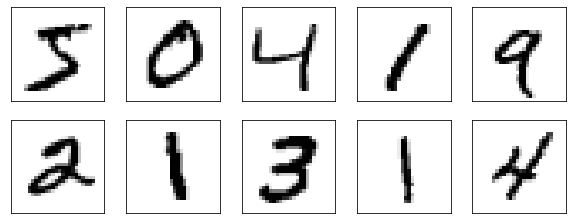

In [3]:
# отображение первых 10 изображений из обучающей выборки (для примера, что лежит в MNIST)
import matplotlib.pyplot as plt
plt.figure(figsize = (10,10))
for i in range(10):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap = plt.cm.binary)
 
plt.show()

Преобразуем матрицу 28x28 (размер изображения) в вектор из 784 элементов и линеаризуем изображение.
Значения элементов: [0;1], 0 - черный, 1 - белый

In [4]:
pixels = x_train.shape[1] * x_train.shape[2]
x_train = x_train.reshape(x_train.shape[0], pixels).astype('float32')
x_test = x_test.reshape(x_test.shape[0], pixels).astype('float32')
# стандартизация входных данных, значения х будут принадлежать [0;1]
x_train = x_train / 255 # изображение размера 28x28, каждый пиксель имеет значение от 0 до 255
x_test = x_test / 255

##### Обучение

In [5]:
import sklearn.svm as svm
model = svm.LinearSVC(dual = True, max_iter = 10000)
model.fit(x_train, y_train)

LinearSVC(max_iter=10000)

##### Расчет и построение confusion matrix - оценка точности классификации

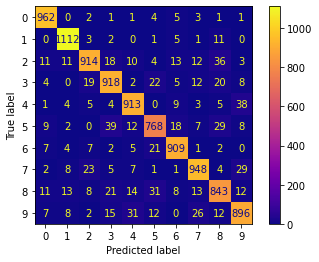

In [6]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, x_test, y_test, cmap = plt.cm.plasma)

##### Точность

In [7]:
model.score(x_test, y_test) # проверяем точность на тренировочных данных

0.9183

##### Проверка нескольких случайных образцов из тестового набора (10000)

Цифра из тестовой выборки -  0
Цифра из предсказания -  0


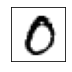

Цифра из тестовой выборки -  2
Цифра из предсказания -  2


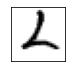

Цифра из тестовой выборки -  1
Цифра из предсказания -  1


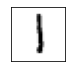

Цифра из тестовой выборки -  0
Цифра из предсказания -  0


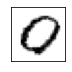

Цифра из тестовой выборки -  2
Цифра из предсказания -  6


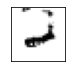

Цифра из тестовой выборки -  2
Цифра из предсказания -  2


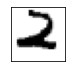

Цифра из тестовой выборки -  1
Цифра из предсказания -  1


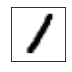

Цифра из тестовой выборки -  8
Цифра из предсказания -  8


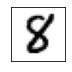

Цифра из тестовой выборки -  8
Цифра из предсказания -  8


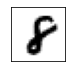

Цифра из тестовой выборки -  9
Цифра из предсказания -  9


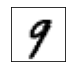

In [8]:
y_predict = model.predict(x_test)

for k in range(10):
    plt.figure(figsize = (1,1))
    idx = np.random.randint(0, 9999)
    print("Цифра из тестовой выборки - ", y_test[idx])
    print("Цифра из предсказания - ", y_predict[idx])
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_testPrint[idx], cmap = plt.cm.binary) # отображение изображения из тестовой выборки
    plt.show()